<a href="https://colab.research.google.com/github/KiranGangoor0301/CustomerChurn/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
print(data.head())

print(data.info())

print(data.describe())

print(data.isnull().sum())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

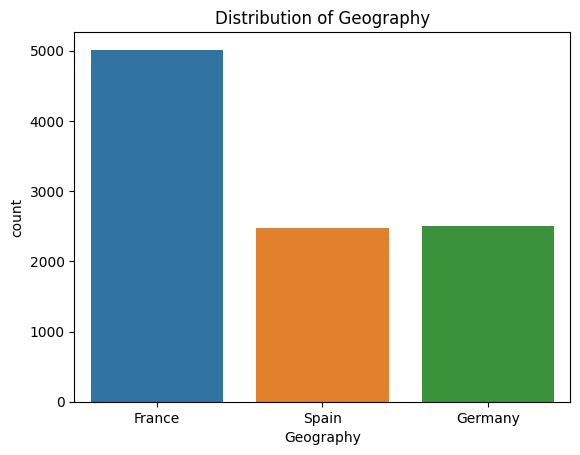

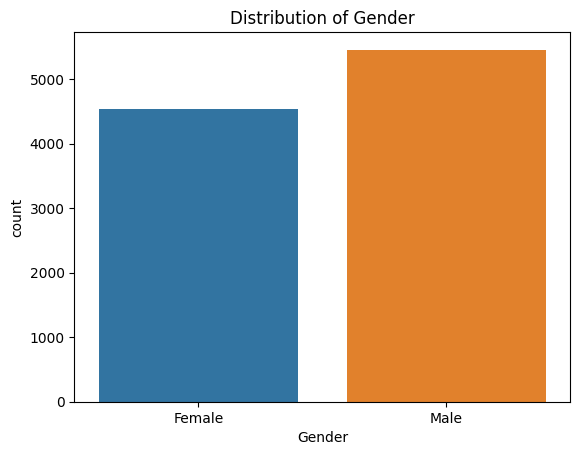

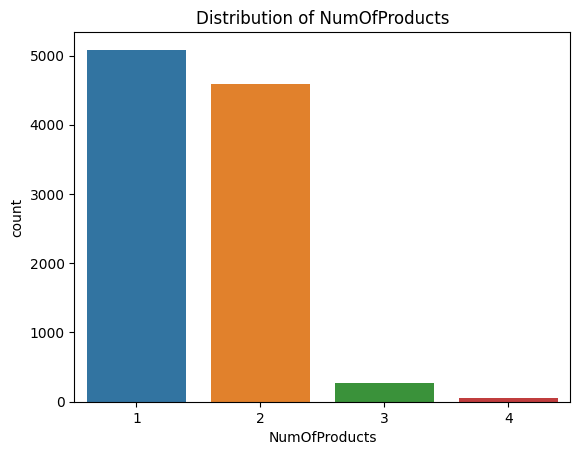

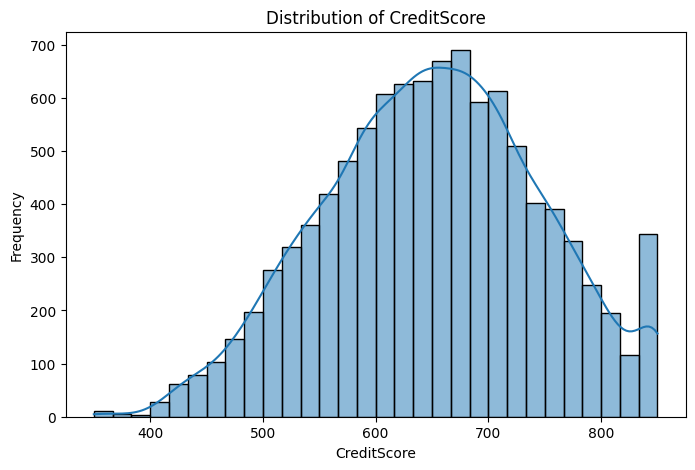

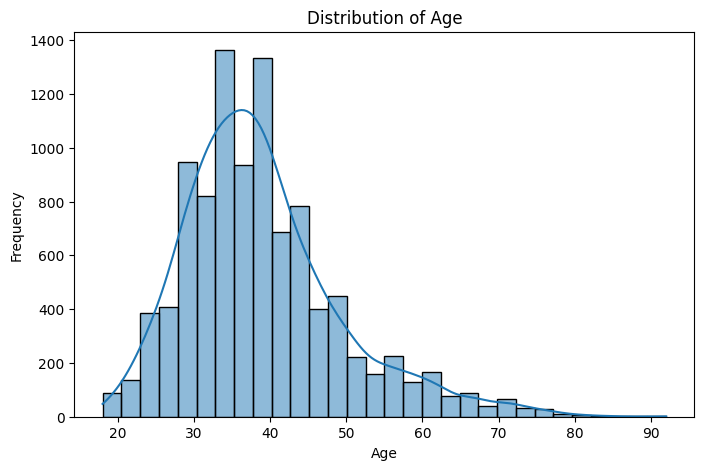

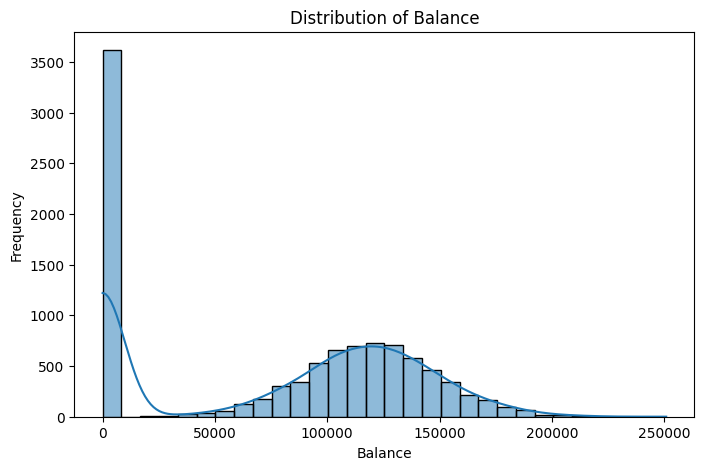

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_columns = ['Geography', 'Gender', 'NumOfProducts']
for column in categorical_columns:
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.show()

numerical_columns = ['CreditScore', 'Age', 'Balance']
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Unique values in Surname: 2932
Unique values in Geography: 3
Unique values in Gender: 2


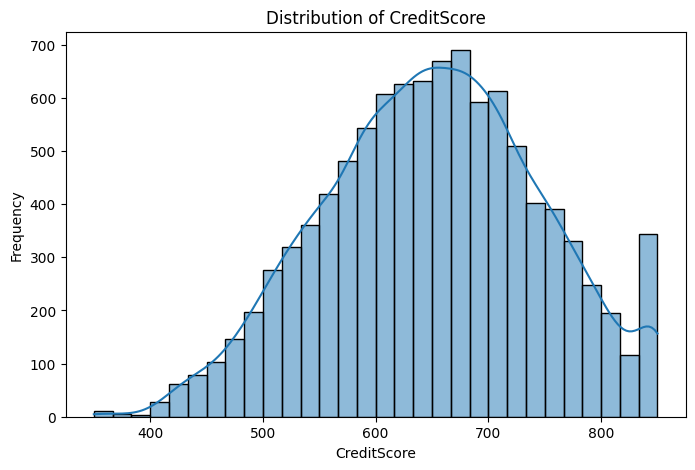

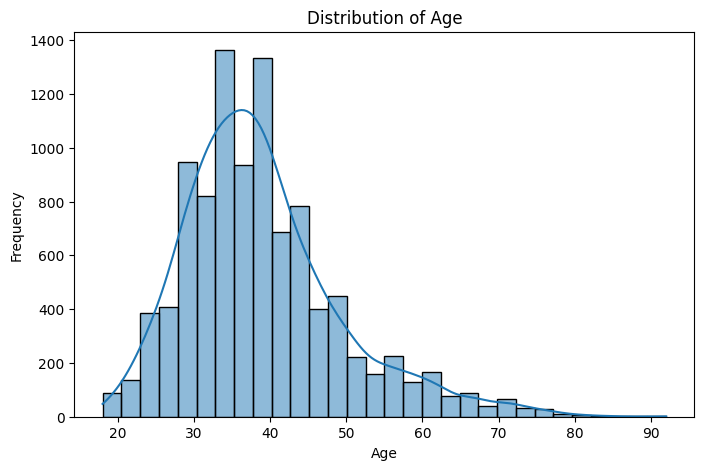

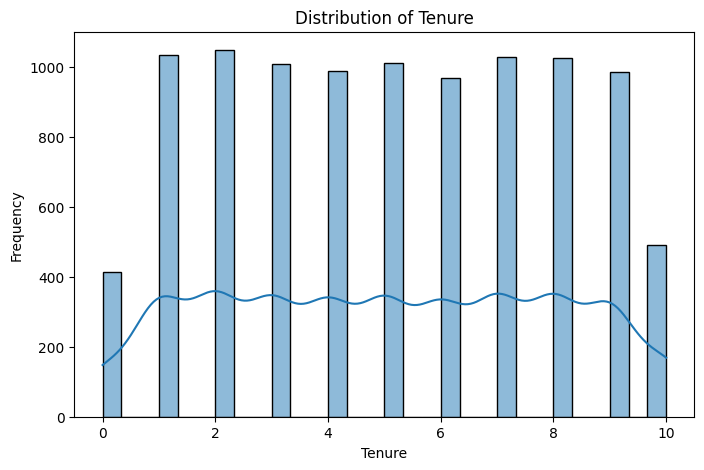

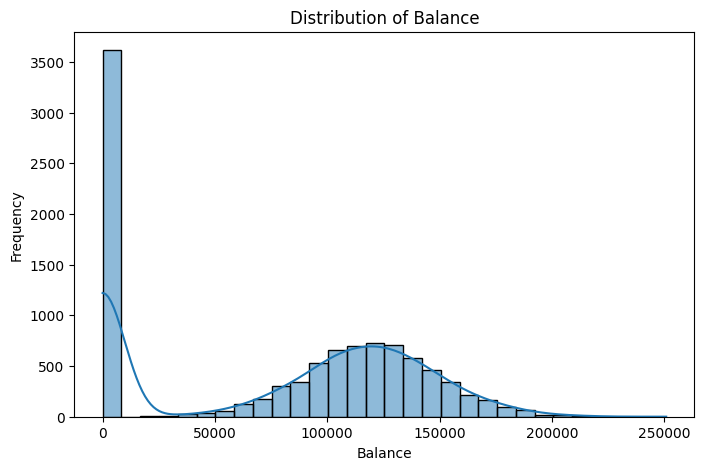

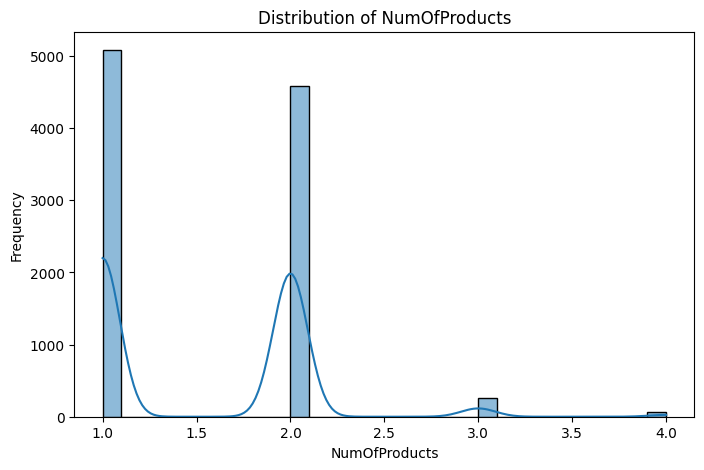

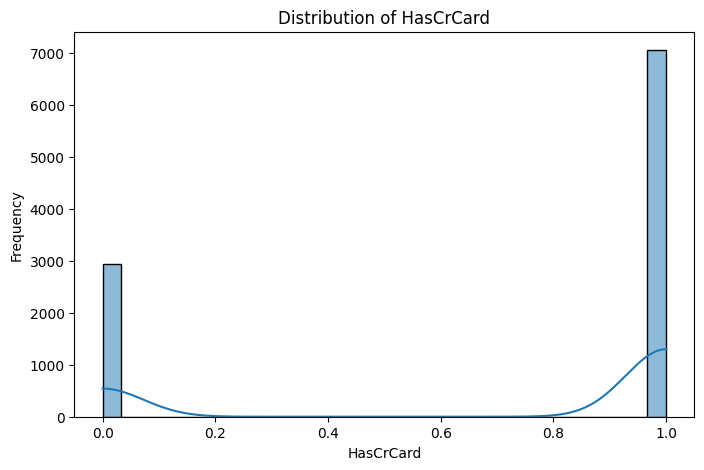

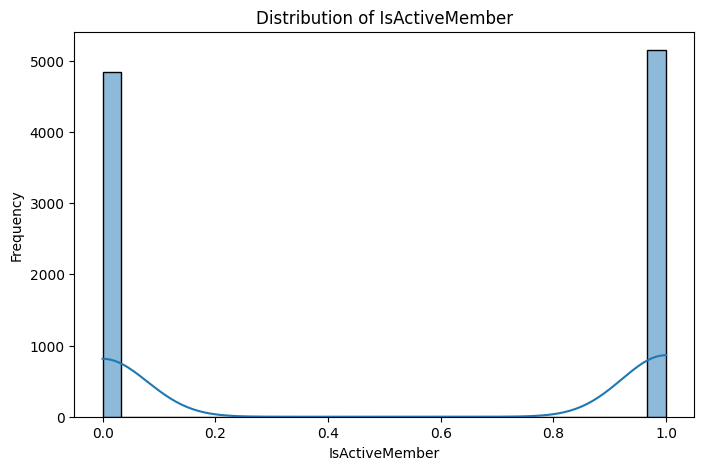

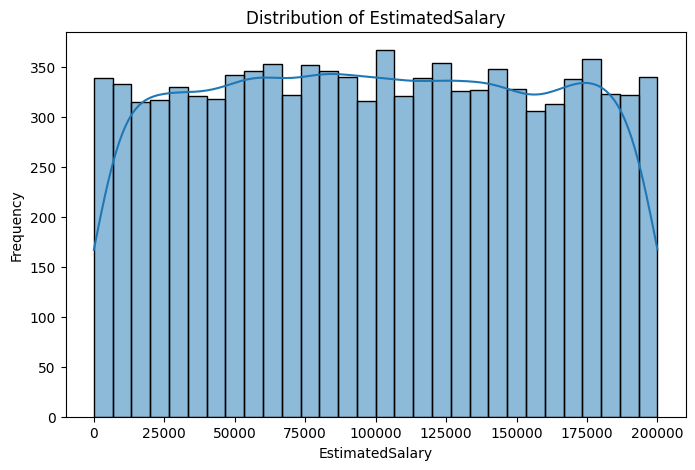

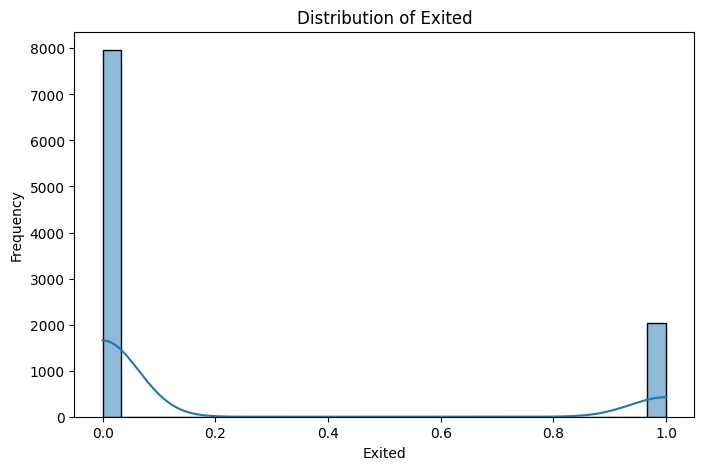

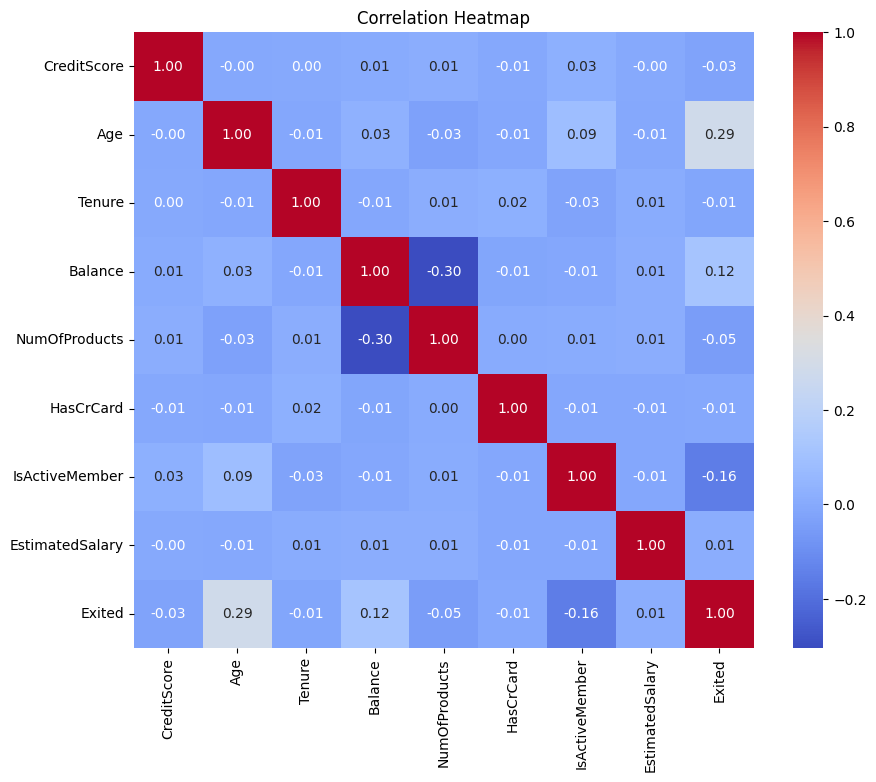

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Unique values in {column}: {data[column].nunique()}")

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop(['RowNumber', 'CustomerId'])
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler


categorical_features = ['Geography', 'Gender']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

data['BalanceSalaryRatio'] = data['Balance'] / (data['EstimatedSalary'] + 1)

data['AgeBalanceInteraction'] = data['Age'] * data['Balance']

age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60+']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
X = data[numeric_columns].drop(columns=['Exited'])
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    report = classification_report(y_test, y_pred)

    results[model_name] = {"Accuracy": accuracy, "Classification Report": report}

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print("Classification Report:\n", metrics['Classification Report'])
    print("-" * 50)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Logistic Regression
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

--------------------------------------------------
Model: Random Forest
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

--------------------------------------------------
Model: XGBoost
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
